<a href="https://colab.research.google.com/github/Lourdest812/Data-Science-I/blob/main/ProyectoDSParteI%2BToledo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Variables potencialmente "interesantes"**

**Radio**: Tamaño del tumor desde su centro hasta el borde.

**Área:** Superficie total que ocupa el tumor.

**Textura**: Regularidad o irregularidad de la superficie del tumor.

**Concavidad**: Qué tan hundida o irregular es la superficie del tumor.

En este proyecto, las variables que se usarán serán los valores medios del radio, el área, la textura y la concavidad en su mayor parte.

In [ ]:
#Importación de las librerías necesarias

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Lourdest812/Data-Science-I/refs/heads/main/breast-cancer-winsconsin-diagnostic-dataset.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
#Reviso si hay valores nulos
print(df.isnull().sum())

#No hay valores nulos

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

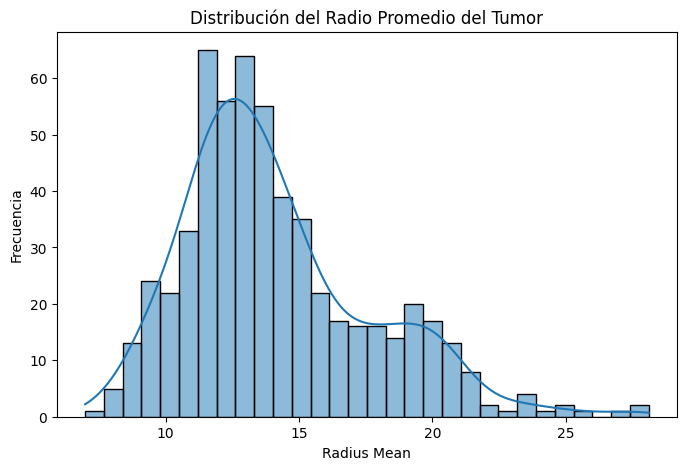

In [ ]:
# 1. Histograma de 'radius_mean'
plt.figure(figsize=(8,5))
sns.histplot(df['radius_mean'], bins=30, kde=True)
plt.title('Distribución del Radio Promedio del Tumor')
plt.xlabel('Radius Mean')
plt.ylabel('Frecuencia')
plt.show()

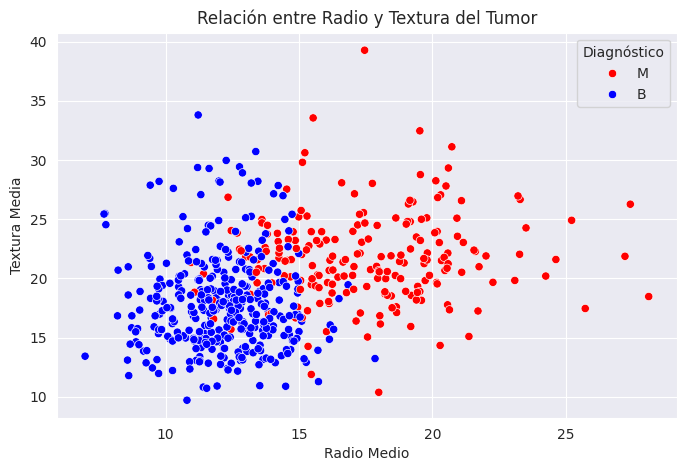

In [ ]:
# 2. Gráfico de dispersión entre 'radius_mean' y 'texture_mean' según el diagnóstico
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis', palette=['red', 'blue'])
plt.title('Relación entre Radio y Textura del Tumor')
plt.xlabel('Radio Medio')
plt.ylabel('Textura Media')
plt.legend(title="Diagnóstico")
plt.show()

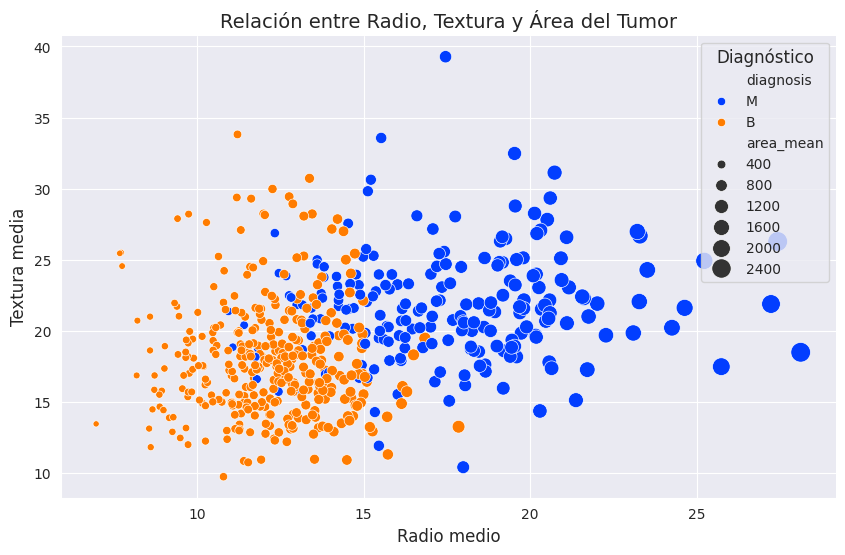

In [ ]:
# 3. Gráfico de dispersión entre el radio, textura y área media del tumor

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_palette("bright")

# Crear el gráfico de dispersión con tamaño del punto según el área
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", size="area_mean", sizes=(20, 200), data=df)

ax.set_title("Relación entre Radio, Textura y Área del Tumor", fontsize=14)
ax.set_xlabel("Radio medio", fontsize=12)
ax.set_ylabel("Textura media", fontsize=12)

ax.legend(title="Diagnóstico", title_fontsize=12, fontsize=10)

sns.despine()

plt.show()

Los tumores malignos tienden a tener un área, radio y a veces textura más prominente que los tumores benignos.

<ipython-input-79-8f35bde7b498>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y='concavity_mean', palette=['red', 'blue'])


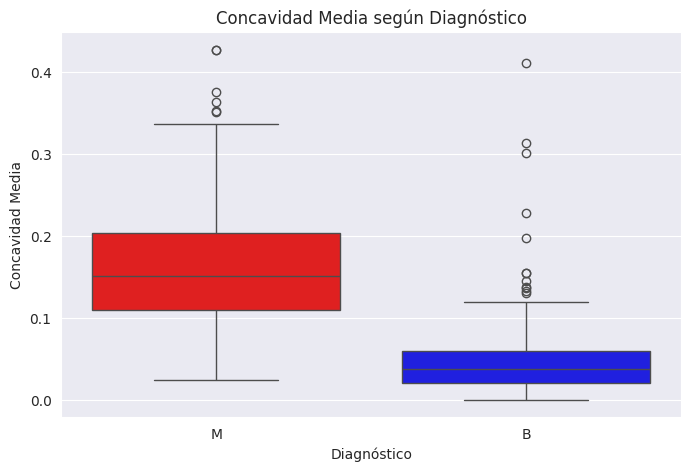

In [ ]:
# 4. Boxplot de 'concavity_mean' según diagnóstico
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='diagnosis', y='concavity_mean', palette=['red', 'blue'])
plt.title('Concavidad Media según Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Concavidad Media')
plt.show()

La concavidad media (que tan irregular es la superficie del tumor) tiende a ser más alta en los tumores malignos.

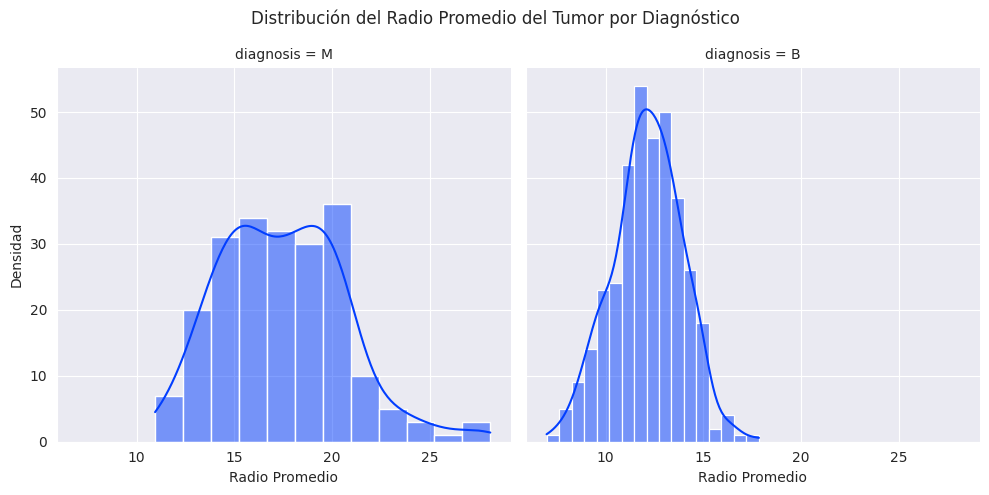

In [ ]:
#5. Distribución del Radio Promedio del Tumor
g = sns.FacetGrid(df, col="diagnosis", height=5)
g.map(sns.histplot, 'radius_mean', kde=True)
g.set_axis_labels("Radio Promedio", "Densidad")
g.fig.suptitle('Distribución del Radio Promedio del Tumor por Diagnóstico')
g.tight_layout()
plt.show()

Los tumores malignos tienden a tener un mayor radio y a tener una densidad constante o incluso baja.